In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [56]:
df=fetch_california_housing()
print(df)
dataset=pd.DataFrame(df.data)
print(dataset)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [57]:
dataset.columns=df.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


independent and dependent featurers

In [58]:
X=dataset
Y=df.target # target is the price of the house
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

train and test split 

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, random_state=40)

In [61]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9226,2.6941,11.0,5.599379,1.085404,2074.0,3.220497,36.93,-120.04
11826,4.8051,21.0,5.857143,1.053391,1874.0,2.704185,39.00,-121.04
4553,1.1979,33.0,2.020725,1.031088,435.0,2.253886,34.06,-118.24
10787,3.1305,25.0,4.310078,1.124031,985.0,1.908915,33.64,-117.92
4104,4.3333,39.0,5.791367,1.000000,511.0,1.838129,34.13,-118.35
...,...,...,...,...,...,...,...,...
11532,1.7675,26.0,3.847093,1.082556,1829.0,1.312994,33.77,-118.09
16065,4.4375,49.0,5.439506,1.004938,1052.0,2.597531,37.75,-122.48
14501,3.0450,16.0,2.708804,1.056433,648.0,1.462754,32.86,-117.23
14555,6.7120,15.0,7.844291,1.010381,1180.0,4.083045,32.96,-117.13


In [62]:
### standardizing the data set
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [63]:
X_train=scaler.fit_transform(X_train)

In [64]:
X_test=scaler.transform(X_test)

In [65]:
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score


In [66]:
regression=LinearRegression()
regression.fit(X_train,Y_train)


LinearRegression()

In [67]:
mse=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=10)
print(mse)
np.mean(mse)

[-0.5537642  -0.53293374 -0.57052959 -0.51623939 -0.50010029 -0.56919075
 -0.51586984 -0.45915307 -0.55382153 -0.48710701]


-0.5258709410636391

Predictions

In [68]:
reg_predict=regression.predict(X_test)

In [69]:
reg_predict

array([2.00412998, 2.57561917, 1.19769801, ..., 2.42460902, 1.73085934,
       1.35765516])

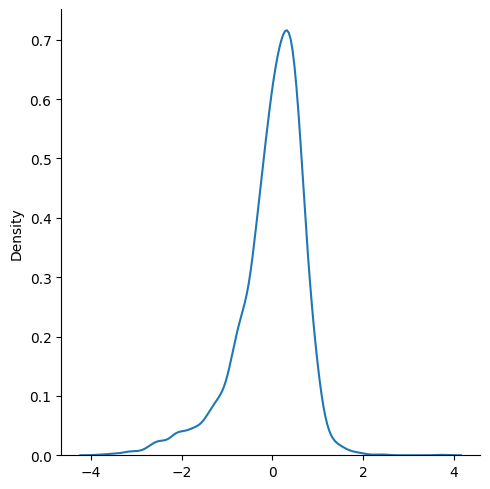

In [70]:
import seaborn as sns
sns.displot(reg_predict-Y_test,kind='kde')

In [71]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score=r2_score(reg_predict,Y_test)

In [72]:
r2_score

0.31856411368063364

In [73]:
mae = mean_absolute_error(reg_predict,Y_test)

# Mean Squared Error
mse = mean_squared_error(reg_predict,Y_test)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(mae,mse,rmse)

0.5389572480554761 0.5417517275769406 0.7360378574346164


Ridge Regression Algorithm

In [74]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [75]:
ridge_regressor=Ridge()

In [76]:
ridge_regressor

Ridge()

In [77]:
pameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)

In [78]:
ridgecv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [79]:
print(ridgecv.best_params_)

{'alpha': 20}


In [80]:
print(ridgecv.best_score_)

-0.5252384479528035


In [81]:
ridge_predict=ridgecv.predict(X_test)
print(ridge_predict)

[2.00825653 2.57170889 1.19180678 ... 2.42448951 1.72669913 1.36346084]


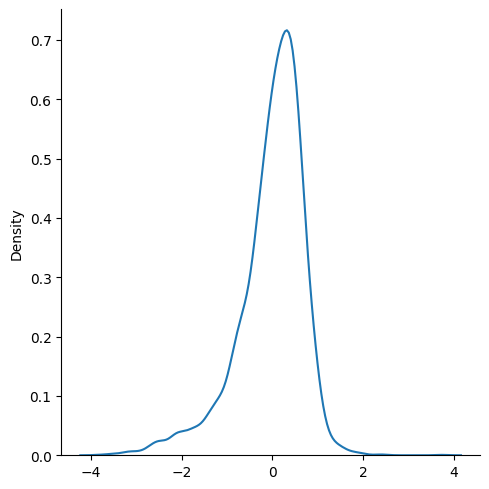

In [82]:
sns.displot(ridge_predict - Y_test, kind='kde')

In [83]:
from sklearn.metrics import r2_score

In [84]:
r2_score_ridge = r2_score(ridge_predict, Y_test)
print(r2_score_ridge)

0.3134580820116456


Lasso regression

In [85]:
from sklearn.linear_model import Lasso


In [86]:
lasso=Lasso()

In [87]:
pameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [88]:
lassocv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [89]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-1.3192738447303847


In [90]:
lasso_predict=lassocv.predict(X_test)

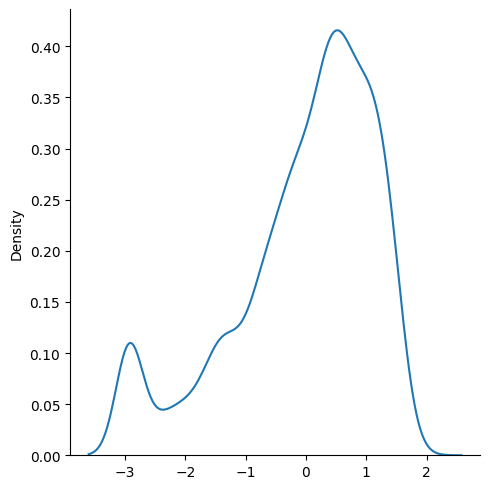

In [91]:
sns.displot(lasso_predict - Y_test, kind='kde')